# Decision Tree Classifier with Wine Dataset
This notebook demonstrates how to use a Decision Tree algorithm on the Wine dataset. We will cover:
- Loading and exploring the dataset
- Training a Decision Tree classifier
- Visualizing how the tree splits the data
- Examining feature importance
- Plotting the decision tree

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore the Wine Dataset
The Wine dataset contains chemical analysis results of wines grown in the same region in Italy but derived from three different cultivars.

In [2]:
# Load the dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Split the Data
We split the data into training and testing sets to evaluate the model's performance.

In [3]:
# Split the data
X = df[data.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
We train a Decision Tree classifier on the training data.

In [4]:
# Train the model
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Visualize the Decision Tree
Let's plot the trained decision tree to see how it splits the data at each node.

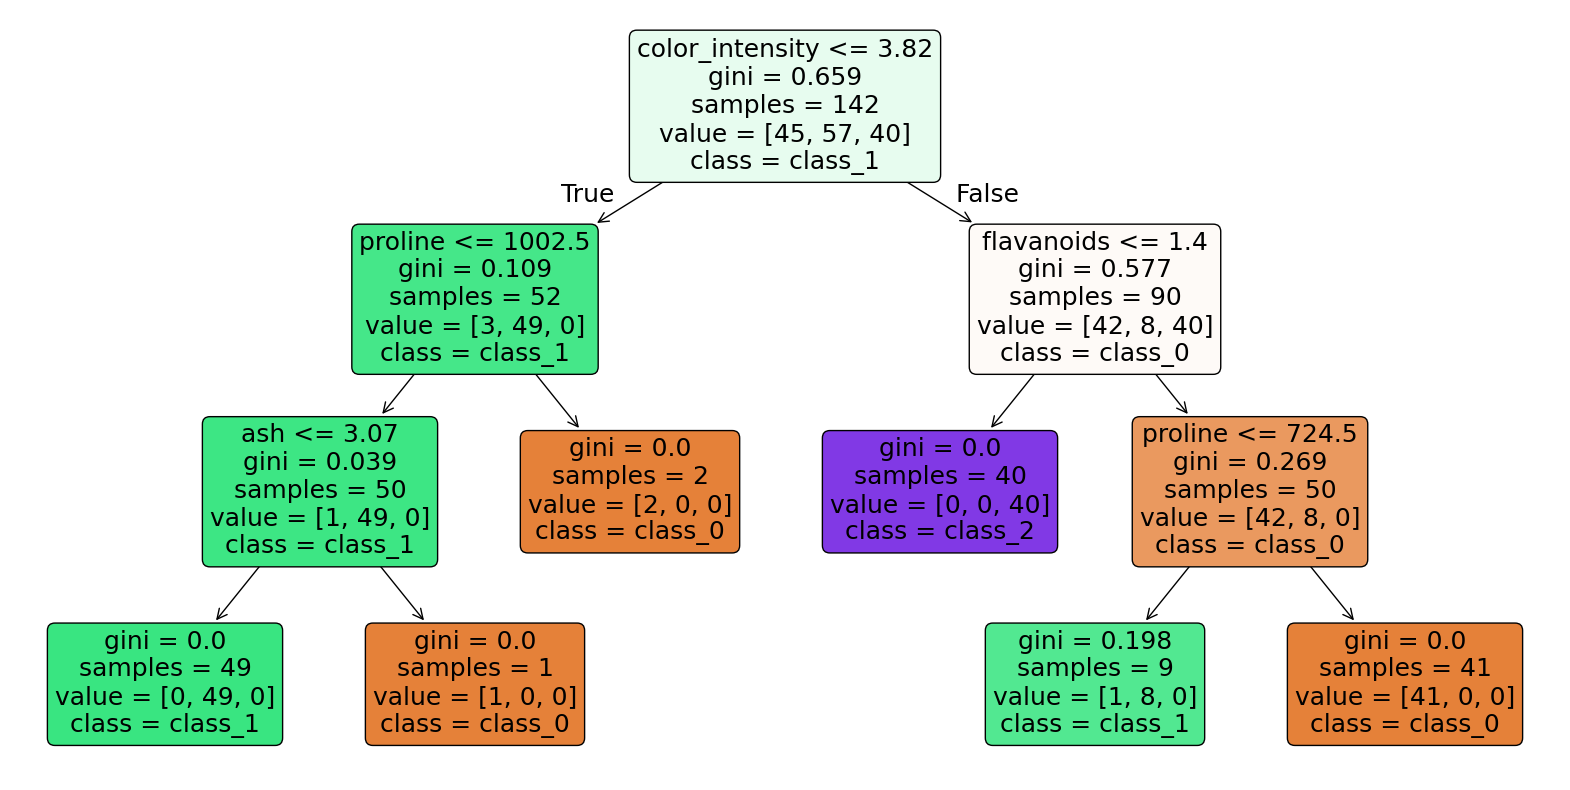

In [5]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.show()

# Feature Importance
Decision trees can estimate the importance of each feature in making predictions. Let's visualize the feature importances.

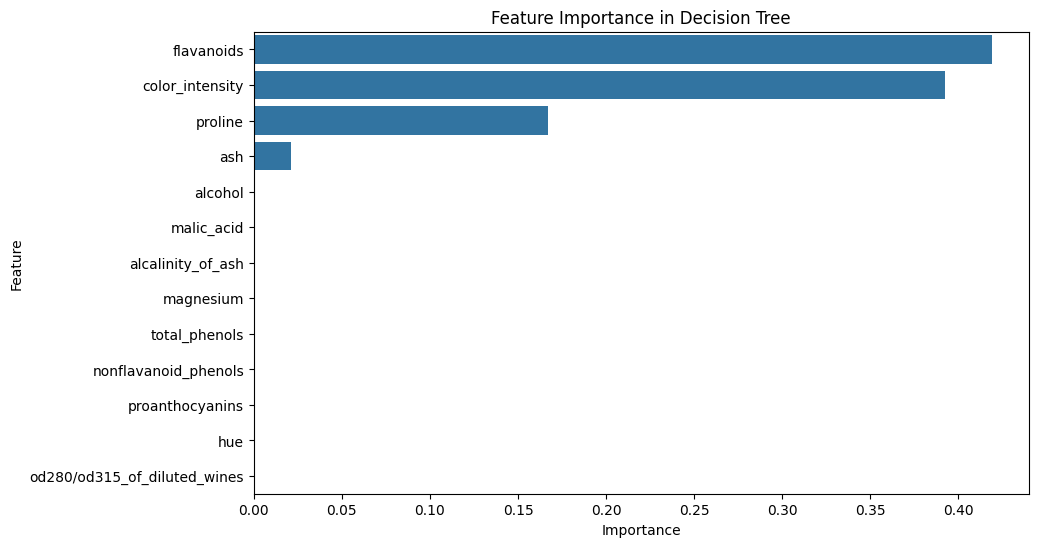

In [6]:
# Feature importance
importances = pd.Series(dt.feature_importances_, index=data.feature_names)
importances = importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Model Evaluation
Evaluate the model's performance on the test set.

In [7]:
# Predict and evaluate
y_pred = dt.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

